In [1]:
import pandas as pd
import numpy as np
from Neural_Network import Neural_Network
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Parte 1. Iris.csv.

In [2]:
iris = pd.read_csv('datasets/iris.csv')

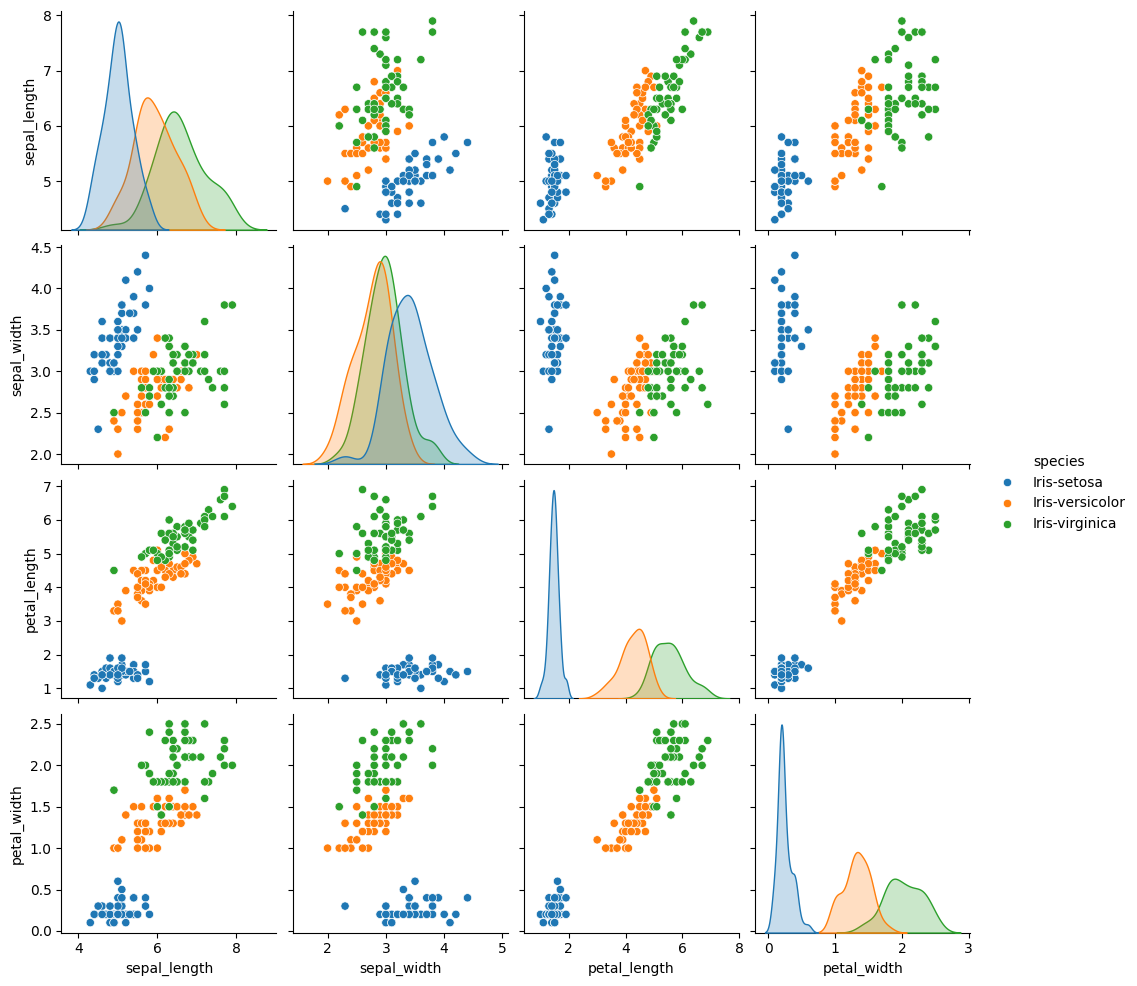

In [3]:
sns.pairplot(data=iris, hue='species')

In [4]:
iris_setosa = iris.copy()
iris_setosa['species'] = iris_setosa['species'].apply(lambda s: 1 if s == 'Iris-setosa' else 0)

In [5]:
iris_versicolor = iris.copy()
iris_versicolor['species'] = iris_versicolor['species'].apply(lambda s: 1 if s == 'Iris-versicolor' else 0)

In [6]:
iris_virginica = iris.copy()
iris_virginica['species'] = iris_virginica['species'].apply(lambda s: 1 if s == 'Iris-virginica' else 0)

In [7]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
iris_species = iris.copy()
iris_species = pd.get_dummies(iris, columns=['species'])

## Clasificadores binarios

### Experimento 1 - Iris_setosa y una capa oculta

### Experimento 2 - Iris_setora y dos capas ocultas

### Experimento 3 - Iris virginica y una capa oculta

### Experimento 4 - Iris virginica y dos capas ocultas

### Experimento 5 - Iris versicolor y una capa oculta

### Experimento 6 - Iris versicolor y dos capas ocultas

## Clasificadores multiclase

### Experimento 1 - Una capa oculta

In [8]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[4],
                    max_iter = 10,
                    learning_rate=0.1)
nw.get_model()

[0.768461443055753, 0.7601921686333968, 0.7244136137978285, 0.7557494772801081, 0.7424743251855866, 0.7487054596518989, 0.7308746524094974, 0.7145613063357072, 0.7182791552991827, 0.7047876986092099, 0.7032491093352444, 0.741421200162669, 0.7275768544606399, 0.7135886391520909, 0.6992296102434612, 0.6988384469765736, 0.6987889872815293, 0.687516393557964, 0.6707676815247995, 0.6902280391556058, 0.7013695357753086, 0.6777795004029161, 0.6903667627366481, 0.6659376082940117, 0.6469564981026287, 0.6310787376923073, 0.6148293069006456, 0.5980318892684071, 0.7072918593868246, 0.6917406500794863, 0.6762960634163382, 0.6614656621433354, 0.7363397071586961, 0.6538776918363354, 0.6400662429295834, 0.6549272974757353, 0.7386419598266859, 0.6452207355821228, 0.6316997722269644, 0.6188343460686871, 0.6797771768251856, 0.7490020575443874, 0.7337447809732323, 0.6367649860913456, 0.6241705427247748, 0.7284427892841078, 0.7071313078195768, 0.6934778192142376, 0.7314484846133793, 0.6897044720412226, 0.

In [9]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[8],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

[0.7470212704486652, 0.7705743675402572, 0.7417553699586006, 0.7222326682501872, 0.6955854271993923, 0.7485051537339165, 0.6747879719930143, 0.7266041854517594, 0.6554590918609964, 0.6316790943735352, 0.7123290886982884, 0.7440038378470714, 0.7183930599131607, 0.693480475651857, 0.6698673627138986, 0.6541361420709988, 0.7210679559152016, 0.6429090291088471, 0.6204731259872382, 0.7163489096026368, 0.6980883012870719, 0.6994152055090372, 0.6864171793298943, 0.6875699160724027, 0.6669133379516767, 0.6426208222172929, 0.6220315785632359, 0.6028923020753219, 0.7240411048340011, 0.7035798231126904, 0.682987554623208, 0.6682694210156659, 0.7595118527676816, 0.6582099480897454, 0.6395758951659316, 0.6931142556850001, 0.7653556729905183, 0.6532912290076681, 0.6361272546199447, 0.6214554332818288, 0.7242584770456856, 0.7798049398524157, 0.7637425280273082, 0.6487198469495898, 0.6328822149037668, 0.7565232504250671, 0.7538311767155126, 0.7380369285111548, 0.7608571322042783, 0.734783492536542, 0.

In [10]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[2],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

### Experimento 2 - Dos capas ocultas

In [ ]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[4, 8],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

KeyboardInterrupt: 

In [ ]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[8, 4],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

In [ ]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[2, 4],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

In [ ]:
nw = Neural_Network(dataset=iris_species, 
                    ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
                    hidden_layer_lengths=[4, 2],
                    max_iter = 1000,
                    learning_rate=0.1)
nw.get_model()

# Parte 2. spam

In [ ]:
spambase = pd.read_csv('datasets/spambase.data') ## hay que agregarle manualmente las columnas
spambase

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
type(np.ndarray([1,2,3,4]))

numpy.ndarray